# 编程练习 2: 逻辑回归

## 1 逻辑回归

在这部分练习中，将会建立一个逻辑回归模型来预测一个学生能否被大学录取。

假设你是一所大学的某部门的管理员，并且你想根据每位申请同学的两次考试成绩来确定他们的录取机会。你拥有以前申请人的历史数据可以用作逻辑回归的训练集。对于每个训练示例，都有申请人两次考试的成绩和录取决定。

任务是建立一个分类模型，根据这两项考试的成绩来评估申请人的录取概率。

### 1.1 可视化数据



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = './data/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Score1', 'Score2','Admitted'])
data.head() # 返回数据的前 n行，默认为5

,Score1,Score2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


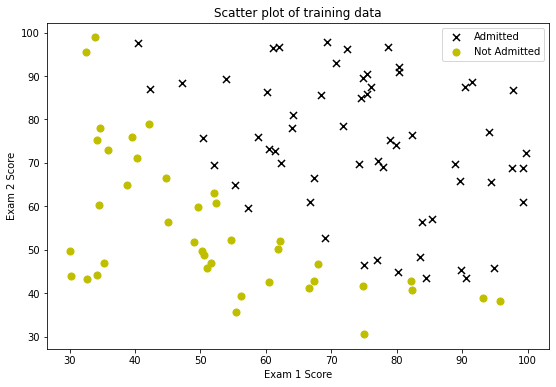

In [2]:
admitted = data[data['Admitted'].isin([1])]
not_admitted = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(admitted['Score1'], admitted['Score2'], s=50, c='k', marker='x', label='Admitted')
ax.scatter(not_admitted['Score1'], not_admitted['Score2'], s=50, c='y', marker='o', label='Not Admitted')
ax.legend()
ax.set_title('Scatter plot of training data')
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

### 1.2 实现

#### 1.2.1 sigmoid 函数

在开始实际代价函数之前，逻辑回归假设定义为：$${h_\theta \left( x \right)} = g \left( \theta^T x \right)$$

g是sigmoid函数，定义为：$$g \left( z \right) = \frac{1}{1 + e^{-z}}$$

首先实现sigmoid函数

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z)) # np.exp(-z) => e^(-z)

测试sigmoid函数

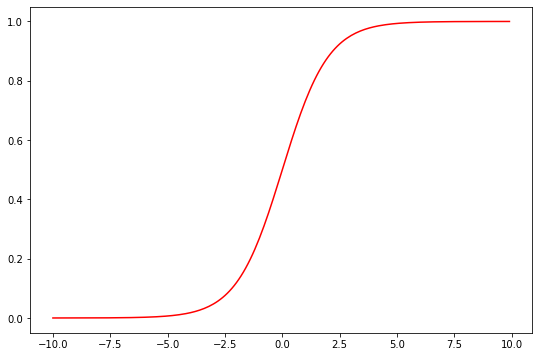

In [4]:
x = np.arange(-10, 10, 0.1)
plt.figure(figsize=(9,6))
plt.plot(x, sigmoid(x), c='r')
plt.show()

#### 1.2.2 代价函数和梯度

逻辑回归中的代价函数：
$$J\left( \theta \right) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{\left(i\right)} \log{\left(h_\theta \left(x^{\left(i\right)}\right) \right)} - \left(1 - y^{\left(i\right)}\right) log{\left( 1 - h_\theta \left(x^{\left(i\right)}\right) \right)} ]$$

In [5]:
def cost(theta, X, y):
    theta, X, y = np.mat(theta), np.mat(X), np.mat(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / X.shape[0]

实现完成后，用初始参数 $\theta$ 代入代价函数计算，结果应是 0.693

In [6]:
data.insert(0, 'Ones', 1)
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]
theta = np.mat(np.zeros(X.shape[1]))
X = np.array(X.values)
y = np.array(y.values)

In [7]:
# 查看一下矩阵维度
X.shape, theta.shape, y.shape

((100, 3), (1, 3), (100, 1))

In [8]:
cost(theta, X, y)

0.6931471805599453

代价的梯度是一个和 $\theta$ 长度相同的向量，其中 $j^{th}$ 元素的定义如下：
$$\frac{\partial J \left( \theta \right)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m {\left( {h_\theta \left( x^{\left(i\right)} \right)} - y^{\left(i\right)} \right)}x_j^{\left(i\right)}$$

虽然这个梯度看起来和线性回归相同，但是实际公式是不同的，因为线性回归和逻辑回归有不同的 $h_\theta \left(x\right)$

In [9]:
def gradient(theta, X, y):
    theta, X, y = np.mat(theta), np.mat(X), np.mat(y)
    params = int(theta.shape[1]) #向量 θ 中的参数个数
    grad = np.zeros(params) #初始化 θ 临时矩阵，用于同时更新
    error = sigmoid(X * theta.T) - y

    for i in range(params): #计算每个参数
        term = np.multiply(error, X[:,i]) # multiply 为矩阵对应相乘
        grad[i] = np.sum(term) / X.shape[0]

    return grad

In [10]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

#### 1.2.3 使用工具库学习参数 $\theta$

在前面的练习中，通过实现梯度下降找到了线性回归模型的最佳参数，编写代价函数并计算其梯度，然后采取相应的梯度下降步骤。现在，使用 scipy.optimize.fmin_tnc 函数（Andrew-Ng在课程中用的是Octave的“fminunc”函数），而不是使用梯度下降。

在逻辑回归中，我们想要通过参数 $\theta$ 优化代价函数 $J\left(\theta\right)$

使用优化函数的输入：
- 尝试优化参数的初始值
- 一个函数，当给定训练集和参数 $\theta$ 时，函数针对数据集 (X, y) 计算相对于 $\theta$ 的逻辑回归代价和梯度

In [11]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result

(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)

使用优化后的 $\theta$ 带入代价函数计算，结果应为 0.203 

In [12]:
cost(result[0], X, y)

0.20349770158947458

使用 $\theta$ 画出训练集的决策边界

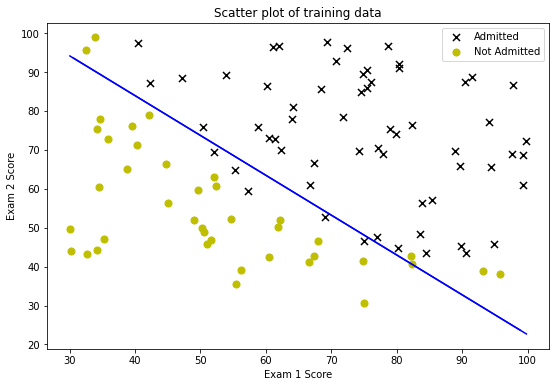

In [13]:
x = np.linspace(data.iloc[:,1:-1].min(), data.iloc[:,1:-1].max(), 100)
f = ( - result[0][0] - result[0][1] * x) / result[0][2]
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x, f, 'b')
ax.scatter(admitted['Score1'], admitted['Score2'], s=50, c='k', marker='x', label='Admitted')
ax.scatter(not_admitted['Score1'], not_admitted['Score2'], s=50, c='y', marker='o', label='Not Admitted')
ax.legend()
ax.set_title('Scatter plot of training data')
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

#### 1.2.4 评价逻辑回归

在学习玩参数后，我们可以使用模型来预测一个特定的学生是否被录取。对于一个Exam1得45分，Exam2得85分的学生，他的录取概率应该为 0.776。

In [14]:
def eval_predict(theta, X):
    return sigmoid(X @ theta.T)
eval_predict(result[0], [1, 45, 85])

0.7762906238162848

另一种评价参数质量的方法是查看模型在训练集上的预测效果。写一个 predict函数，在给定数据集和学习后的参数向量 $\theta$ 基础上，提供 ‘0’ 或 ‘1’ 的预测。最后通过计算正确示例的百分比来评估分类器训练的准确性。

In [15]:
def predict(theta, X):
    probability = sigmoid(X @ theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [16]:
predictions = predict(result[0], X)
correct = [1 if (a == 1 and b == 1) or (a == 0 and b == 0) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print(f'accuracy = {accuracy}%')

accuracy = 89%


## 2 正则化逻辑回归